<a href="https://colab.research.google.com/github/wudiubaobao/assessment-2/blob/main/Yeonjung_Choi_assignmennt2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Working in a group of three, analyse the Australian Energy dataset using Python in Google Colab notebooks to understand SQLite databases, data exploration, data visualization, and applying industry best practices in programming.

Create two notebooks:

a business report (which includes code, analysis, and discussion) and a development notebook, which includes pseudocode, testing, and any other industry best practice not observable from the business report.

# Import libraries

First, we uploaded the original database, “AUS_energy_sqlite3.db”. Then we import the four libraries we need to work with the code. The four libraries are shown below.

1. Sqlite3: A fast and lightweight file-based relational database system
2. Pandas: A Python library for working with and analyzing data, providing a useful data structure called a dataframe.
3. Numpy: A Python library for working quickly with arrays and linear algebra.
4. Matplotlib.pyplot: A Python library for creating charts, graphs, and other 2D data visualizations.

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

Loading the data -
connect to the provided SQLite database using the SQLite3 library

In [3]:
# Connect to 'AUS_energy_sqlite.3.db' database
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Query to retreive table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
# Fatch all table names
tables = cursor.fetchall()
# Print the table names
for table in tables:
  print(table[0])

# Close the connection when done
conn.close()

AUS_energy


# Data Exploration

In [4]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Specify the table name for which you want to retrieve column names
table_name = 'AUS_energy'

# Query to retrieve column names
cursor.execute("PRAGMA table_info({})".format(table_name))

# Fetch all column names
columns = cursor.fetchall()

# Print the column names
for column in columns:
  print(column[1])

# Close the connection when done
conn.close()

Year
State
Coal (PJ)
Oil (PJ)
Gas (PJ)
Renewables (PJ)
Population
GSP ($ million)


In [5]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# sql syntax select (column list) from (table name)
cursor.execute("SELECT * FROM AUS_energy")
rows = cursor.fetchall()

# Close the connection when done
conn.close()
rows

[('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695),
 ('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532),
 ('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579),
 ('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526),
 ('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174),
 ('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165),
 ('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562),
 ('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326),
 ('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670),
 ('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276),
 ('2009-10', 'QLD', 547.5, 466.9, 195.8, 107.4, 4404744, 290556),
 ('2009-10', 'SA', 79.7, 120.5, 119.5, 20.4, 1627322, 102303),
 ('2009-10', 'TAS', 11.5, 41.5, 13.6, 40.0, 508847, 28402),
 ('2009-10', 'NT', '', 51.9, 42.0, 0.5, 229778, 19469),
 ('2010-11', 'WA', 130.6, 341.5, 494.9, 15.3, 2353409, 271336),
 ('2010-11', 'NSW', 732.2, 685.0, 146.5, 68.6, 7586514, 550

# Load the database into a Pandas Dataframe

In [6]:
# Use Pandas to load the query results into data frames
# Given dataset
data = rows

# Define column names
columns = ['Year','State','Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)','Population','GSP($ milion)']

# Create a list of dictionaries where each dictionary represents a row of data
data_dict = [{columns[i]: row[i] for i in range(len(columns))} for row in data]

# Create a Pandas Dataframe
df = pd.DataFrame(data_dict)

# Print the DataFrame
df

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


In [7]:
# Look at the first 10 rows of the dataframe
df.head(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
5,2008-09,TAS,12.4,41.6,11.2,37.1,504353,28165
6,2008-09,NT,,54.8,39.9,0.4,226027,19562
7,2009-10,WA,125.6,290.0,474.9,14.6,2290845,259326
8,2009-10,NSW,771.8,638.9,148.7,63.8,7506058,539670
9,2009-10,VIC,688.7,448.4,263.5,36.0,5461101,372276


In [8]:
# Look at the last 10 rows of the dataframe
df.tail(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
88,2020-21,SA,25.4,143.3,92.2,44.3,1802601,118271
89,2020-21,TAS,8.1,40.0,7.3,43.4,567239,35195
90,2020-21,NT,,37.6,106.2,1.5,248151,24890
91,2021-22,WA,121.1,422.5,673.1,41.2,2789148,377257
92,2021-22,NSW,534.6,547.2,145.3,125.4,8622575,706003
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [9]:
# General overview of the structure and content of dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            98 non-null     object 
 1   State           98 non-null     object 
 2   Coal(PJ)        98 non-null     object 
 3   Oil(PJ)         98 non-null     float64
 4   Gas(PJ)         98 non-null     float64
 5   Renewables(PJ)  98 non-null     float64
 6   Population      98 non-null     int64  
 7   GSP($ milion)   98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [10]:
# Outputs summary information about dataframe
df.describe()

,Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


# Viewing the data structure

# Discovering inappropriate data

# Data cleasing

# Data Analysis
**GROUP D**

4.Analyse the energy intensity, defined as energy consumption per unit of GSP, for each
state annually and chart these figures

**I wasn't sure if I needed to plot the graphs separately or put each state's energy intensity in one line graph, so I made both**

This problem is to analyze the annual energy intensity of each state and draw related graphs. According to the assignment requirements, energy intensity is equal to energy consumption divided by DSP.there is no colum called"energy intensity",it need to be calculated by the formula below:

energy intensity(PJ/milliom)=energy consumption(PJ)/GSP(million)

input=energy intensity(PJ/million)

output=broken line graph

source: 1. https://www.geeksforgeeks.org/python-pandas-pivot_table/?ref=header_search      


source:  2.chatgpt



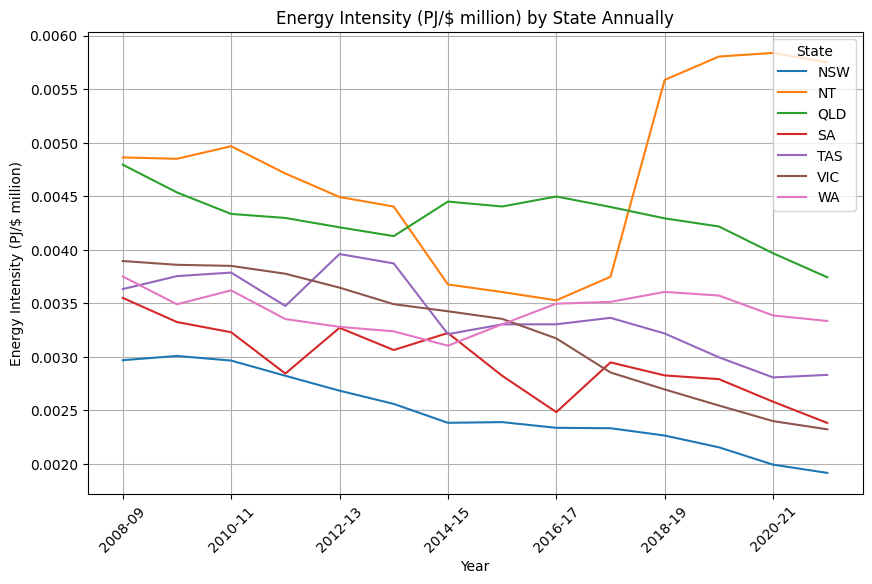

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by State and Year to calculate total energy consumption and mean GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Pivot the data for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(ax=plt.gca())

plt.title('Energy Intensity (PJ/$ million) by State Annually')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ/$ million)')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True)

plt.show()

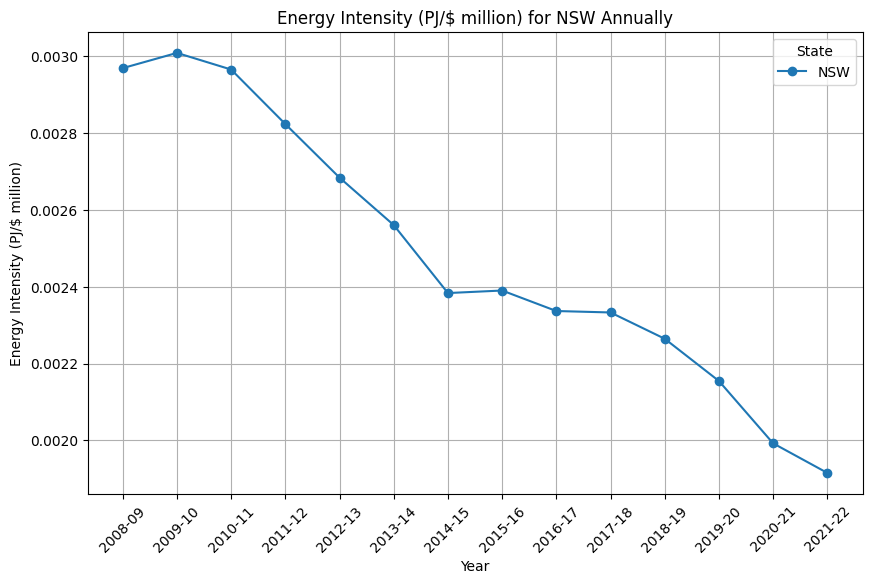

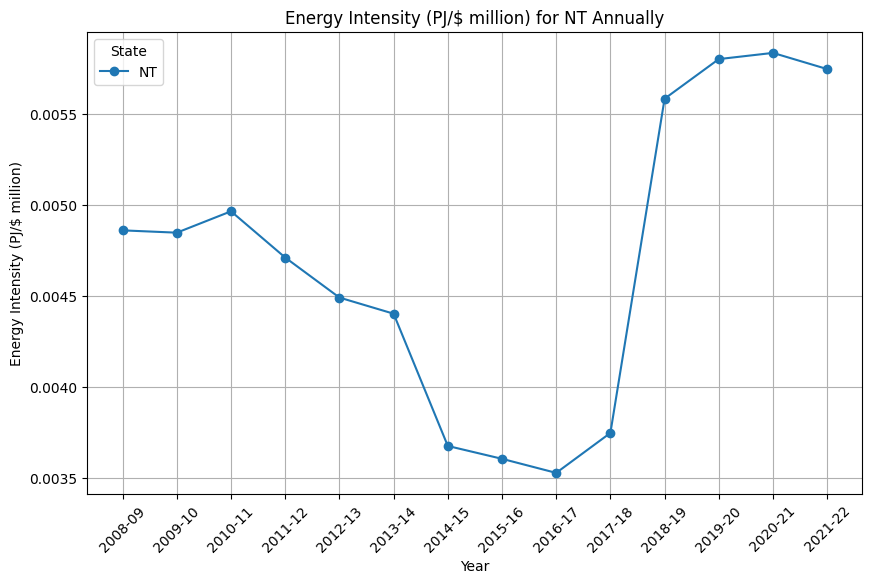

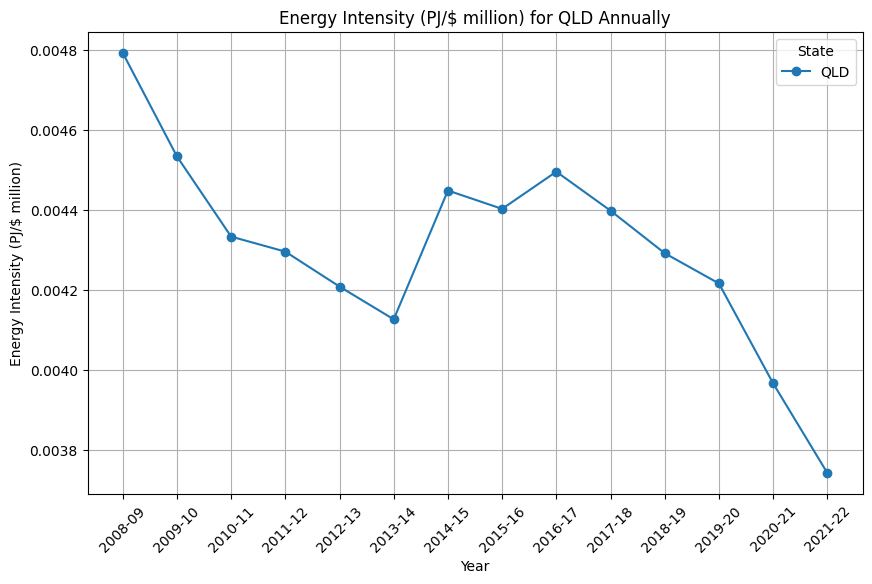

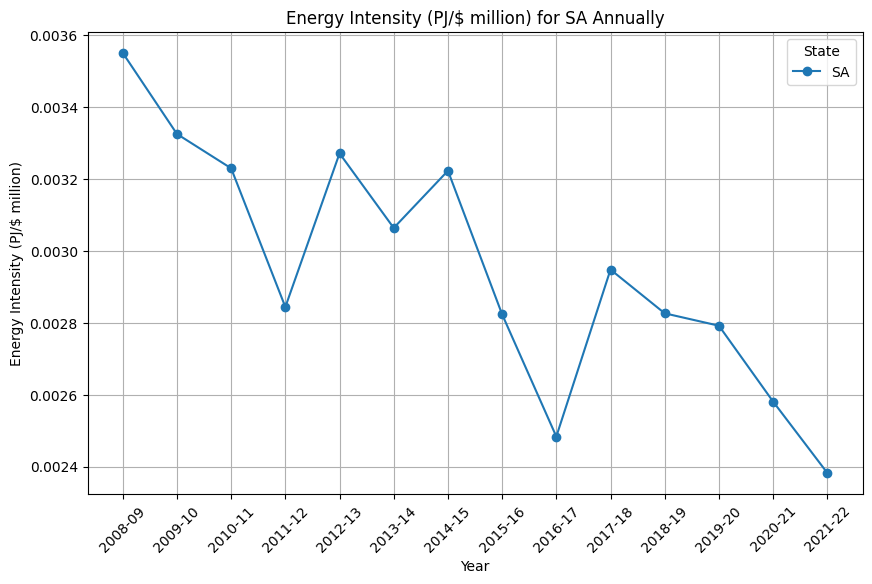

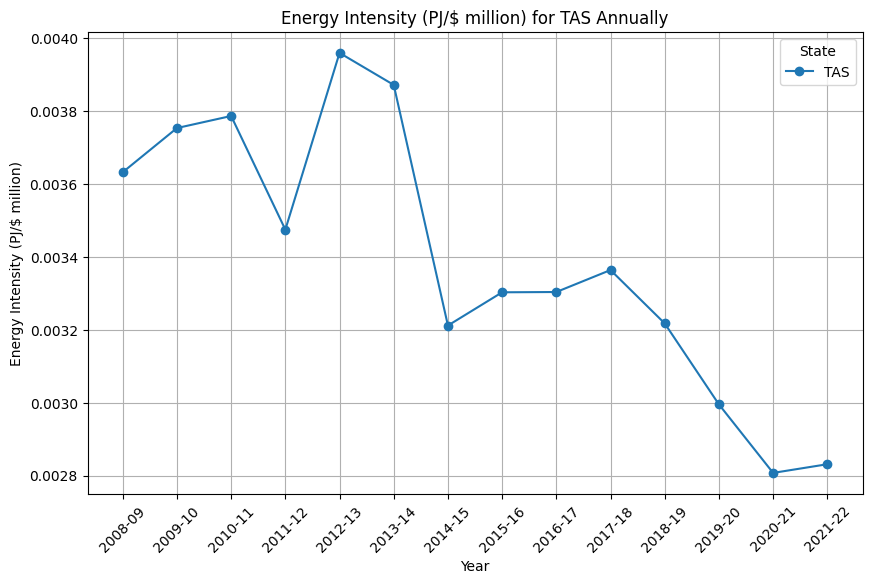

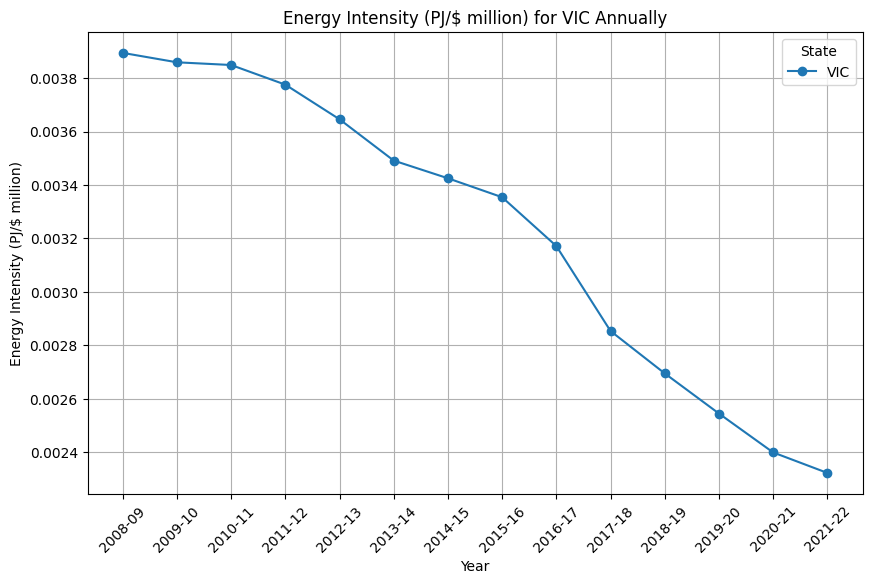

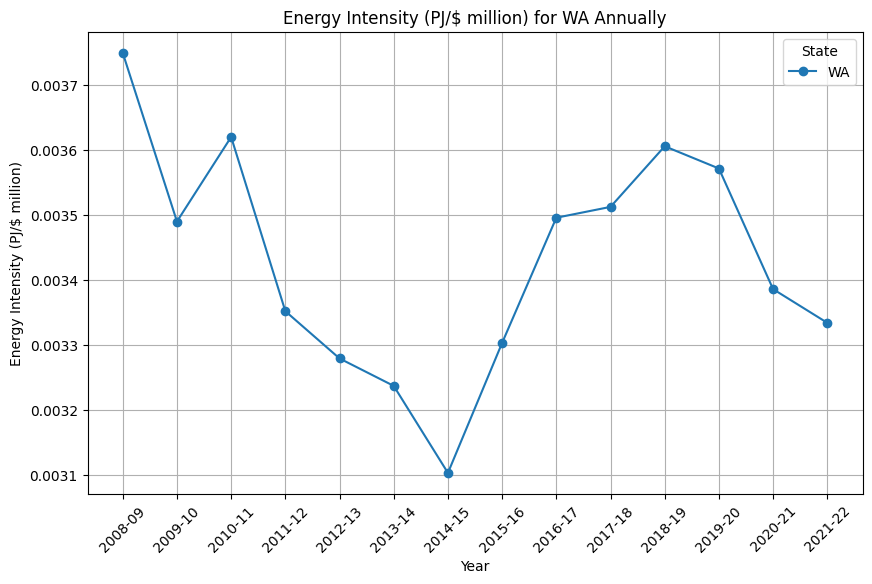

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by State and Year to calculate total energy consumption and mean GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Generate a line chart of states
states = grouped['State'].unique()

# Use a loop function to draw a line chart of energy intensity in each state
for state in states:
    state_data = grouped[grouped['State'] == state]

    plt.figure(figsize=(10, 6))
    plt.plot(state_data['Year'], state_data['Energy_Intensity'], marker='o', label=state)

    plt.title(f'Energy Intensity (PJ/$ million) for {state} Annually')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (PJ/$ million)')
    plt.xticks(rotation=45)
    plt.legend(title='State')
    plt.grid(True)
    plt.show()

We drew the code according to the instructor, but an error was reported, so I asked chatgpt and it gave me this line of code.

**chatgpt give answer:**
# Pivot the data for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(ax=plt.gca())`



**chatgpt also give me this example help me understand**

If grouped contains data like this:

State	Year	Total_Energy_Consumption	GSP($ milion)	Energy_Intensity

NSW	2020	100	50	2.0

NSW	2021	110	55	2.0

VIC	2020	120	60	2.0

VIC	2021	130	65	2.0

After the pivot operation, pivot_table will look like this:

Year	NSW	VIC

2020	2.0	2.0

2021	2.0	2.0


**You can also find the related functions and usage of this function on this website https://www.geeksforgeeks.org/python-pandas-pivot_table/?ref=header_search**

# Interpretation of Results

# Limitations and Recommendations

# Reflection on Python Notebooks

# Reflection on Gen AI

# Conclusion

# References